In [62]:
!pip install wordcloud

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

     -------------------------------------- 153.1/153.1 kB 4.5 MB/s eta 0:00:00


In [48]:
# Getting the dataset
fields=['target','ids','date','query','user','text']
df = pd.read_csv("tweetsentimentdata.csv", encoding="ISO-8859-1", names=fields)
pd.options.display.max_colwidth = 280
# Removing unnecessary columns
df = df[['target', 'text']]

Negative    800000
Positive    800000
Name: target, dtype: int64


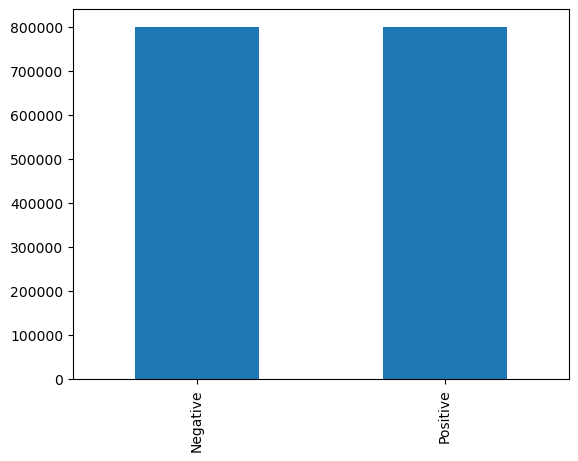

In [49]:
# Visualize the data sentiment distribution
sentiments = {0: "Negative", 4: "Positive"}
print(df.target.apply(lambda x: sentiments[x]).value_counts())
df.target.apply(lambda x: sentiments[x]).value_counts().plot(kind = 'bar')
plt.show()

In [68]:
def preprocess_text(text):
    # Clean the text data: 
    # remove usernames, urls, hashtags, numbers, and dates
    # downcast to lowercase

    # patterns
    url = r'https?:\/\/[\w\-\.]+\.[a-zA-Z]{2,}\/?\S*'
    username = r'@\w+'
    hashtag = r'#\w+'
    dates = r'\d{4}-\d{2}-\d{2}'

    #removing
    text = re.sub(url, '', text)
    text = re.sub(username, '', text)
    text = re.sub(hashtag, '', text)
    text = re.sub(dates, '', text)
    text = re.sub(r'\d+', '', text)

    # lowercase text
    #df['text'] = df['text'].astype('category')
    text = text.lower()
    
    # Remove stopwords
    stop_words = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'doing', 'down', 'during', 'each','few', 'for', 'from', 
             'further','he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

    words = text.split()
    words = [word for word in words if word.lower() not in stop_words]
    text = " ".join(words)
    
     
    
#     #remove stopwords again b/c some had punctuation next to chars(...)
#     new_stopwords = ['im', 'cant']
#     stpwrd = nltk.corpus.stopwords.words('english')
#     stpwrd.extend(new_stopwords)
#     words = [word for word in words if word.lower() not in stop_words]
#     text = " ".join(words)
    
    # Remove punctuation
    punct = r'[^\w\s]+'
    text = re.sub(punct, '', text)
    
    
    return text

In [69]:
df['text'] = df['text'].apply(preprocess_text)
#replacing blank cells with NaN
df['text'].replace('', np.nan, inplace=True)
#removing rows with no text
df.dropna(subset = ['text'], inplace = True)
df.head(10)

,target,text
0,0,awww thats bummer shoulda got david carr third day do it d
1,0,upset cant update facebook texting it might cry result school today also blah
2,0,dived many times ball managed save rest go bounds
3,0,whole body feels itchy like fire
4,0,no its not behaving all im mad here cant see over there
5,0,not whole crew
6,0,need hug
7,0,hey long time no see yes rains bit only bit lol im fine thanks hows
8,0,nope didnt have
9,0,que muera


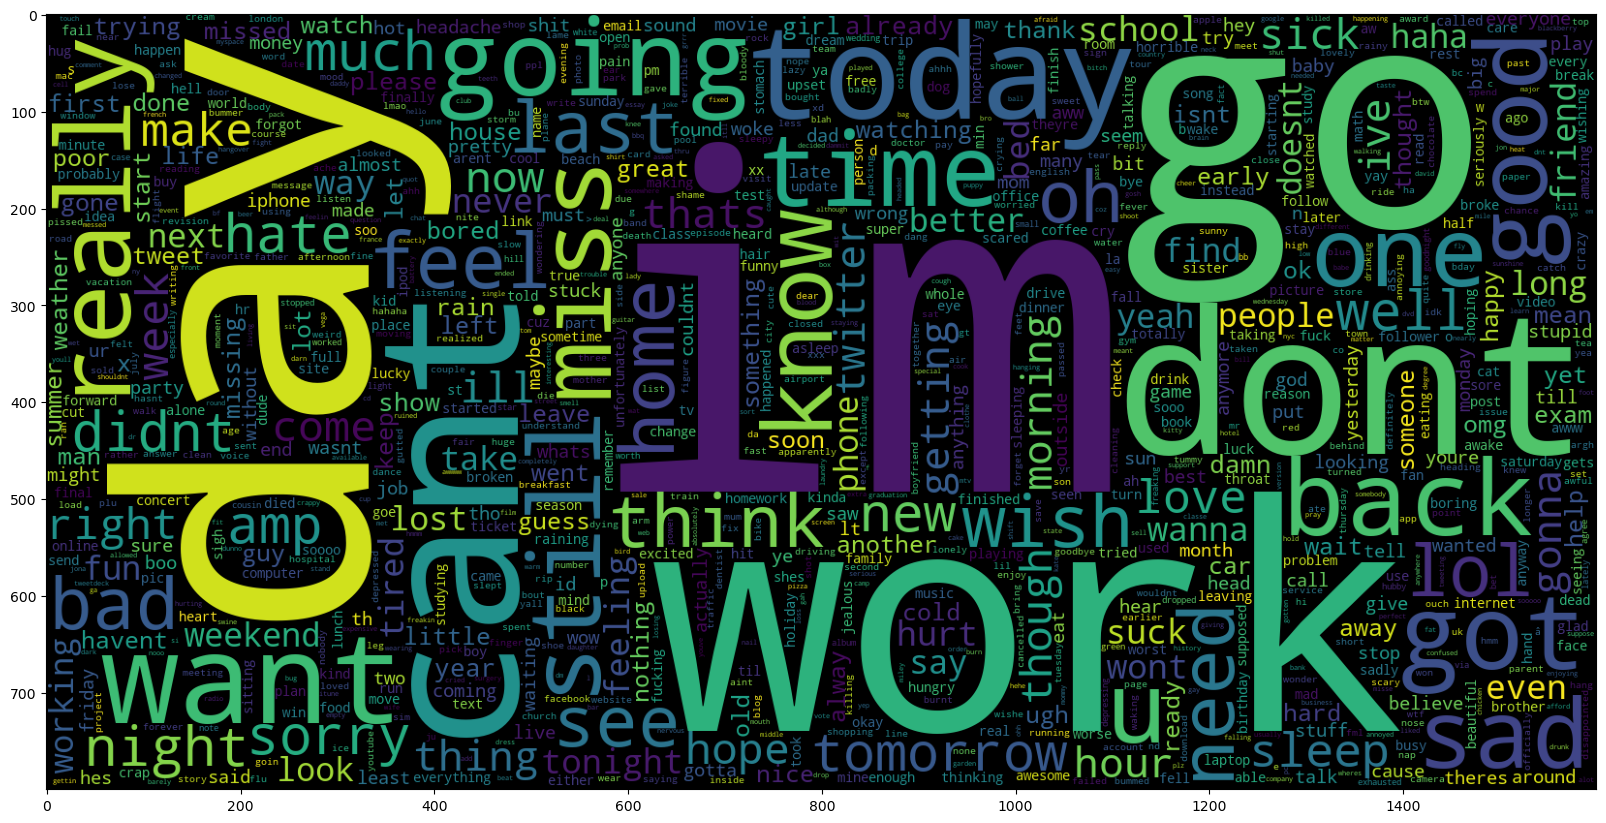

In [72]:
data_neg = df['text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

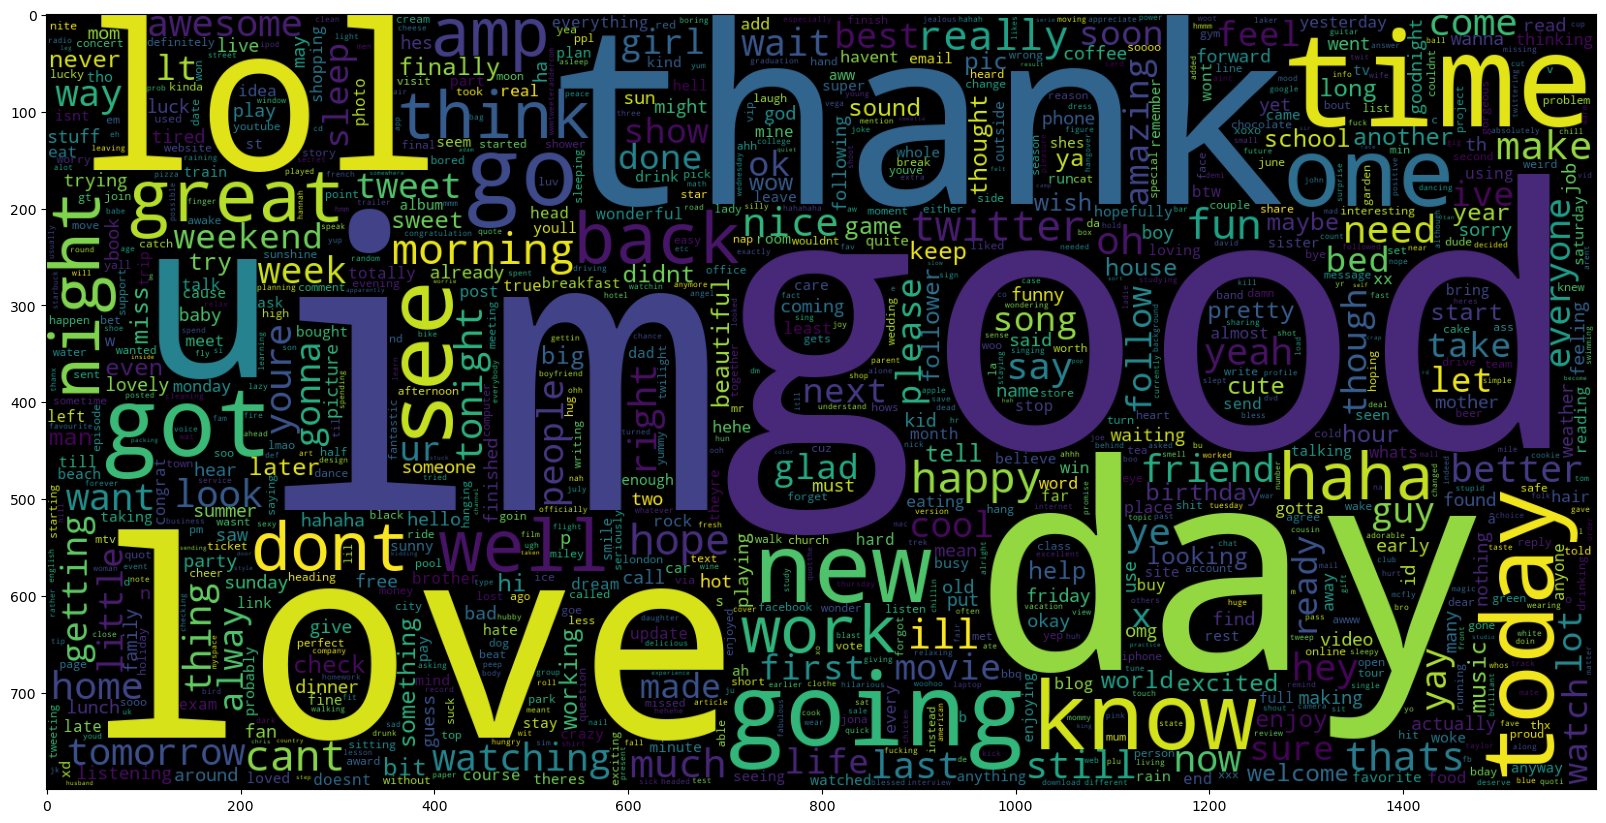

In [71]:
data_pos = df['text'][800000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

In [50]:
# Splitting the data. 90% training data, 10% test data
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'],
                                                    test_size = 0.1, random_state = 0)

X_test


557138                 wants to compete! i want hard competition! i want to rally. i want to feel the power coming out of the engine! i want to compete 
349381         It seems we are stuck on the ground in Amarillo. They have put a ground stop for all flights leaving for Denver. Said updates in an hour 
182051     where the f are my pinking shears? rarararrrarararr...babyproofing while cutting stuff makes me stick shears random places &amp; forget them 
571236                                                                                0ff t0 tHE MEEtiN..  i HAtE WhEN PPl V0lUNtEER MY fREE tiME..gRRR!
1339637                                                                                                                                  @ reply me pls 
                                                                               ...                                                                      
156019                                                                            

In [51]:
# Vectorize the data. 
# Vectorization -> process of transforming text data into a numerical representation that can be used by models
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectorizer.fit(X_train)
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [52]:
def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.76      0.60      0.67     79780
           4       0.67      0.81      0.73     79688

    accuracy                           0.70    159468
   macro avg       0.71      0.70      0.70    159468
weighted avg       0.71      0.70      0.70    159468



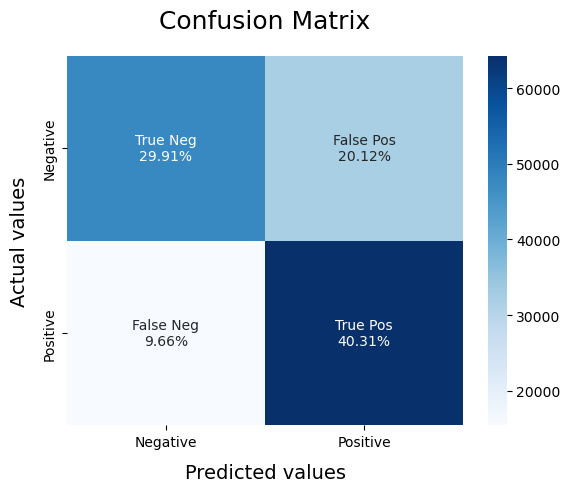

In [34]:

# create random forest object
RFmodel = RandomForestClassifier(n_estimators=100, max_depth=10)

# fit the model to training data
RFmodel.fit(X_train, y_train)

# evaluate the model
model_Evaluate(RFmodel)

              precision    recall  f1-score   support

           0       0.80      0.75      0.77     79780
           4       0.77      0.81      0.79     79688

    accuracy                           0.78    159468
   macro avg       0.78      0.78      0.78    159468
weighted avg       0.78      0.78      0.78    159468



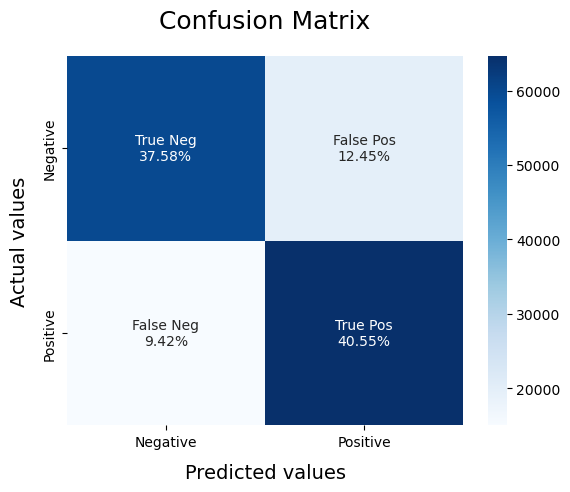

In [35]:
BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)

Time Taken: 106 seconds
              precision    recall  f1-score   support

           0       0.83      0.82      0.83     79738
           4       0.82      0.84      0.83     80262

    accuracy                           0.83    160000
   macro avg       0.83      0.83      0.83    160000
weighted avg       0.83      0.83      0.83    160000



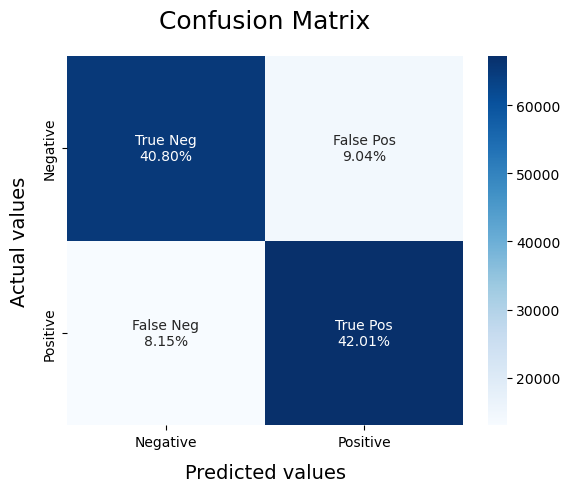

In [66]:
import time
t = time.time()
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
print(f'Time Taken: {round(time.time()-t)} seconds')
model_Evaluate(LRmodel)

In [54]:
file = open('Sentiment-LR.pickle','wb')
pickle.dump(LRmodel, file)
file.close()

In [55]:
def load_models():
    '''
    Replace '..path/' by the path of the saved models.
    '''
    
    # Load the vectoriser.
    file = open('..path/vectoriser-ngram-(1,2).pickle', 'rb')
    vectoriser = pickle.load(file)
    file.close()
    # Load the LR Model.
    file = open('..path/Sentiment-LRv1.pickle', 'rb')
    LRmodel = pickle.load(file)
    file.close()
    
    return vectoriser, LRmodel

def predict(vectorizer, model, text):
    # Predict the sentiment
    textdata = vectorizer.transform(text)
    sentiment = model.predict(textdata)
    
    # Make a list of text with sentiment.
    data = []
    for text, pred in zip(text, sentiment):
        data.append((text,pred))
        
    # Convert the list into a Pandas DataFrame.
    df = pd.DataFrame(data, columns = ['text','sentiment'])
    df = df.replace([0,4], ["Negative","Positive"])
    return df

In [75]:
tweets = ["This movie was boring", "The movie was exciting", "The movie is amazing", "The movie is scary"]
    
df_tweets = predict(vectorizer, LRmodel, tweets)
print(df_tweets.head())

                     text sentiment
0   This movie was boring  Negative
1  The movie was exciting  Positive
2    The movie is amazing  Positive
3      The movie is scary  Negative
